In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

# How Big is Data ?

In [3]:
df.shape

(891, 12)

# How does Data Look Like?

In [4]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.00,0,0,C 7075,6.4500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


# What is types of Data Cols ?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Are there any missing Values ?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# How does data mathematically look ?

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Are there is any duplication in data?

In [8]:
df.duplicated().sum()

np.int64(0)

# How is the correlation between the cols ?

In [14]:
X = df.select_dtypes(include = ['int64' , 'float64'])
X.coor()
df.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Types of Data 
-i) Numeric Data 
-ii) Categorical Data 

# Univariate Analysis 
its a analysis of 1 col
-i) Is data numerical or categorical ?

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Categorical Data Analysis 
-I) 
# Bar Chart

<Axes: xlabel='Survived'>

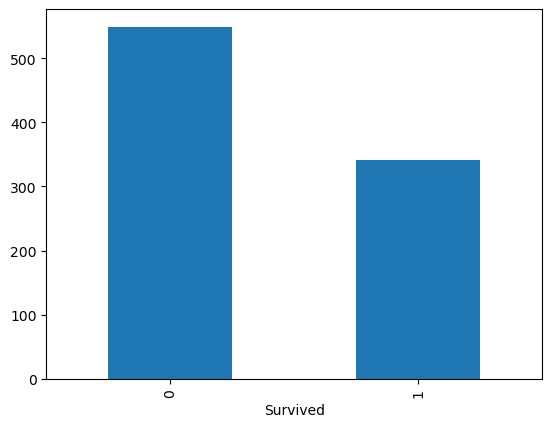

In [21]:
# we can also count values through pandas 
# df['Survived'].value_counts().plot(kind='bar')

# we can it with seaborn also
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

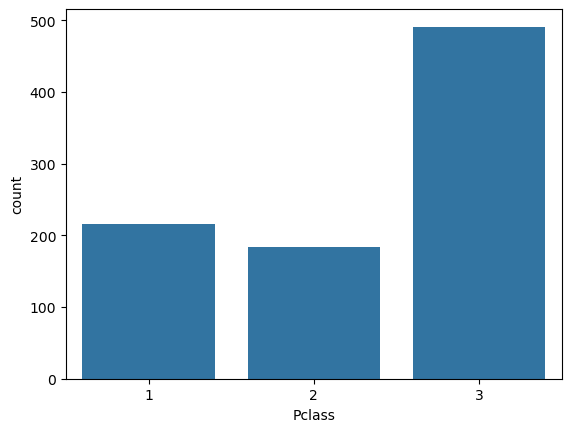

In [28]:
# df['Pclass'].value_counts().plot(kind='bar')
sns.countplot(data = df , x = 'Pclass')

<Axes: ylabel='count'>

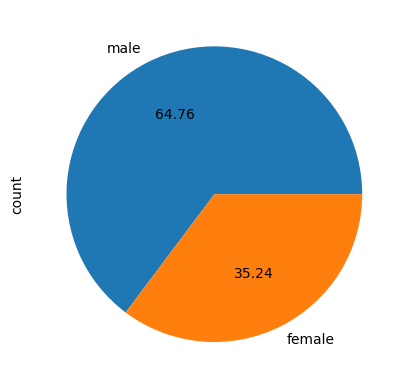

In [36]:
df['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

# Numerical Data 
## Histogram

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

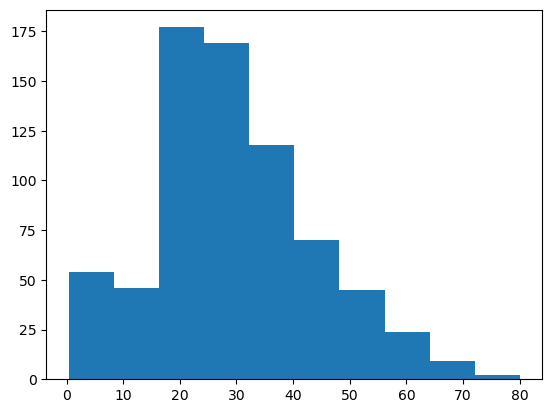

In [39]:
plt.hist(df['Age'])

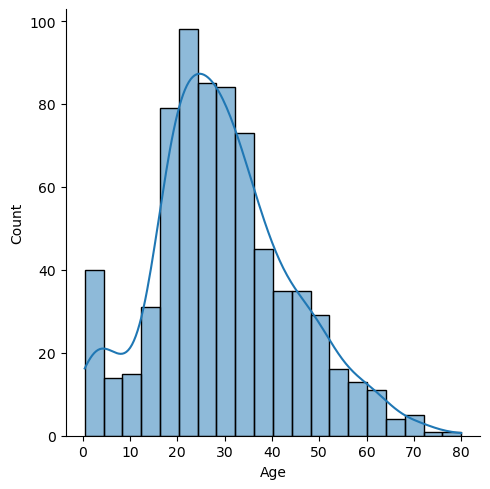

In [44]:
sns.displot(df['Age'], kde = True)

<Axes: ylabel='Age'>

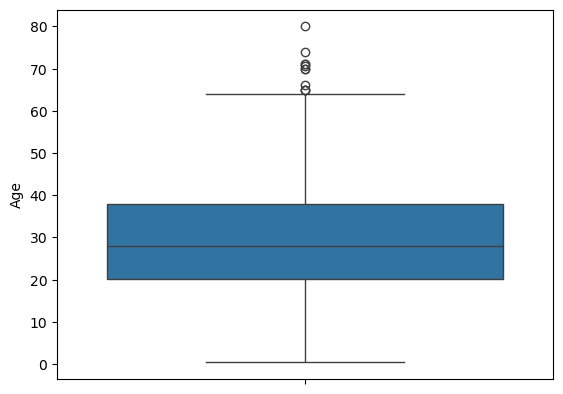

In [45]:
sns.boxplot(df['Age'])

In [47]:
df['Age'].skew()
# finding out the skewness in the data

np.float64(0.38910778230082704)

# EDA using Bivariate and Multivariate Analysis 

In [54]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

In [55]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Scatter Plot (Numerical + Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

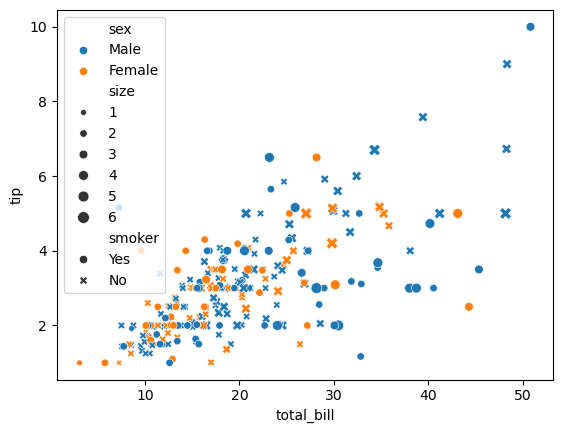

In [59]:
sns.scatterplot(x = tips['total_bill'] , y = tips['tip'] , hue = tips['sex'] ,style=tips['smoker'] , size = tips['size'])

# Bar Plot Numerical - Categorical

<Axes: xlabel='Pclass', ylabel='Fare'>

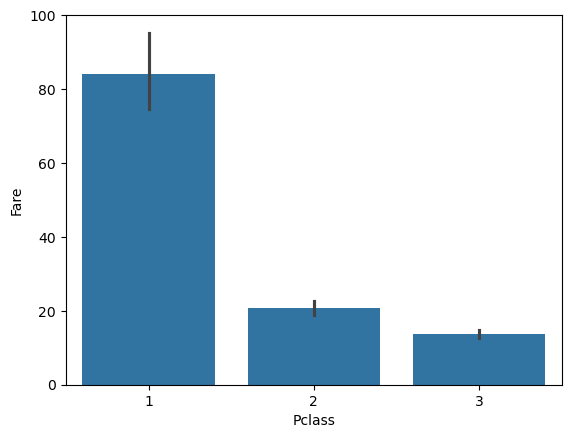

In [69]:
# sns.barplot(y='Age' , x='Pclass' , data = df)
sns.barplot(y='Fare' , x='Pclass' , data = df)

# Box Plot Numerical - Categorical

<Axes: xlabel='Age', ylabel='Sex'>

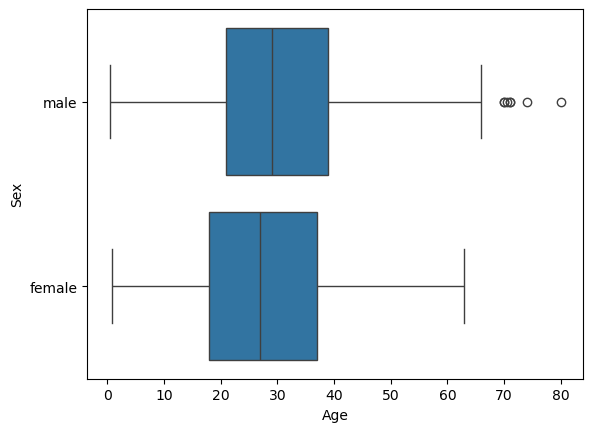

In [72]:
sns.boxplot(x='Age', y='Sex' , data = df)

# Dis Plot Numerical - Categorical

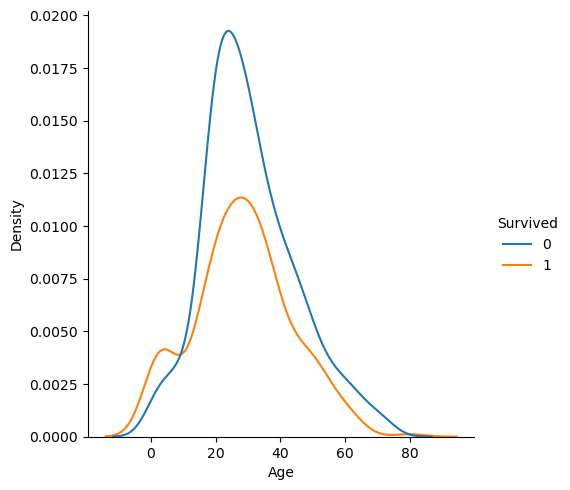

In [80]:
sns.displot(x = 'Age' , hue= 'Survived' , data= df , kind = 'kde')

<Axes: xlabel='Survived', ylabel='Pclass'>

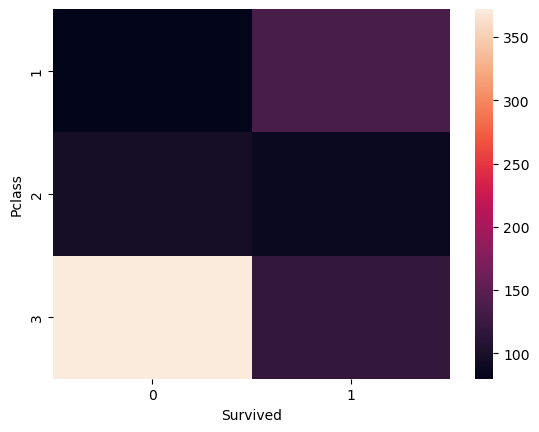

In [82]:
sns.heatmap(pd.crosstab(df['Pclass'] , df['Survived']))

<Axes: xlabel='Pclass'>

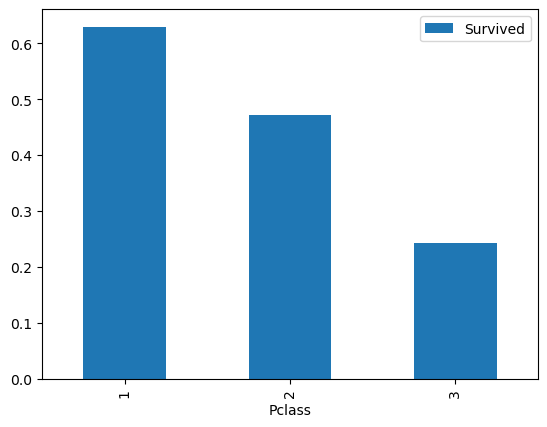

In [85]:
df.groupby('Pclass')[['Survived']].mean().plot(kind='bar')

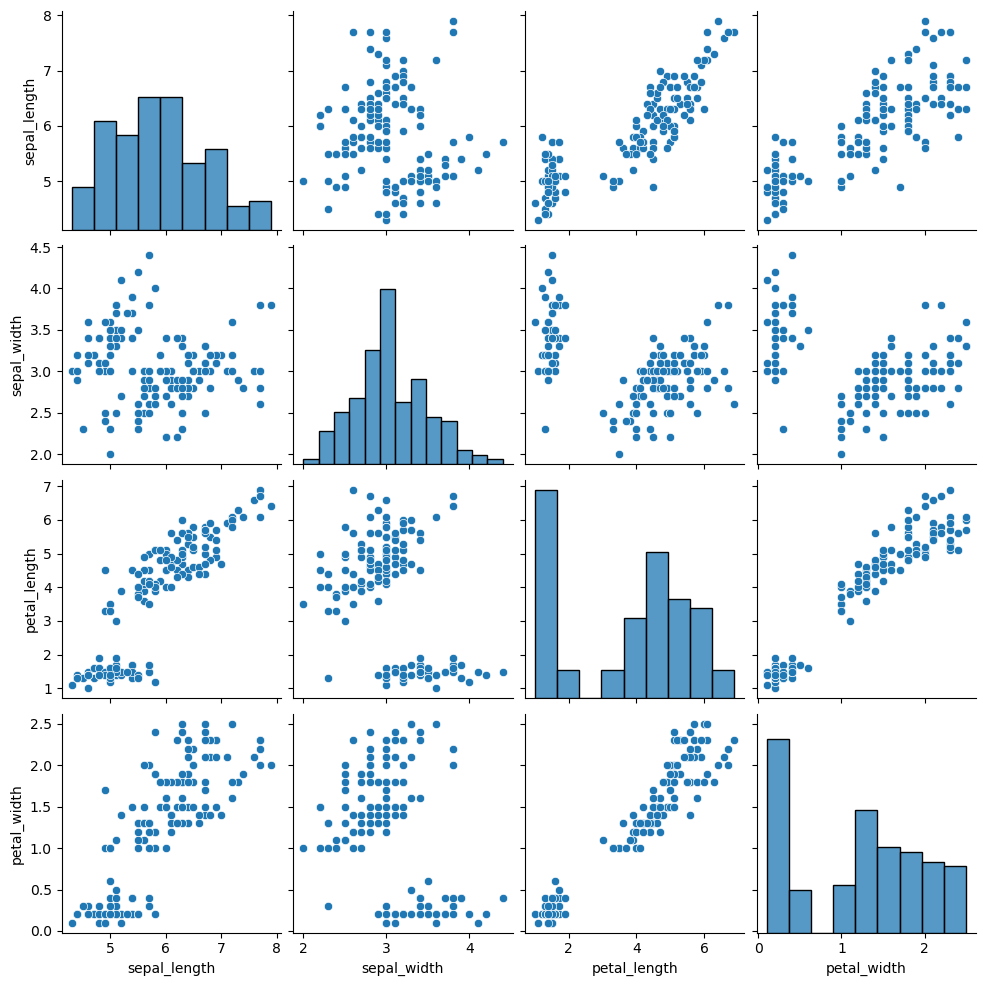

In [86]:
sns.pairplot(iris)